In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error
import statsmodels.api as sm

In [7]:
budgets = pd.read_csv("../data/budget.csv")
budgets.head()

,Program Id,Year,Budget
0,1,2000,4364453
1,2,2000,4156821
2,3,2000,4293441
3,1,2001,3573017
4,2,2001,3579567


In [9]:
programs = {
    "1": "Housing",
    "2": "Food Protection",
    "3": "STD Clinic"
}

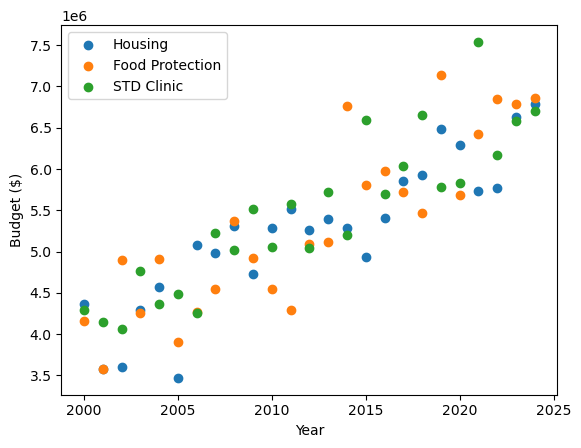

In [17]:
for program in programs:
    temp_df = budgets[budgets["Program Id"] == int(program)]
    plt.scatter(temp_df["Year"], temp_df["Budget"], label=programs[program])

plt.xlabel("Year")
plt.ylabel("Budget ($)")

plt.legend()
plt.show()

In [19]:
funding = pd.read_csv("../data/funding.csv")
funding.head()

,Program Id,Year,Type,Amount
0,1,2000,tax,1784979
1,1,2000,non-tax,1933729
2,2,2000,tax,2136594
3,2,2000,non-tax,2052807
4,3,2000,tax,1235526


/var/folders/35/b0ls076115s6jq6jrbnwq3m80000gn/T/ipykernel_15297/99814311.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "Non Tax": [avg_funding[0], avg_funding[1], avg_funding[2]],
/var/folders/35/b0ls076115s6jq6jrbnwq3m80000gn/T/ipykernel_15297/99814311.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "Tax": [avg_funding[3], avg_funding[4], avg_funding[5]]


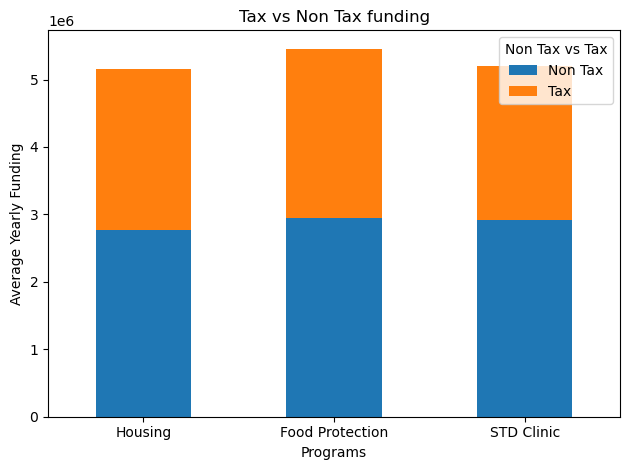

In [21]:
ny_funding = funding.drop("Year", axis=1)
avg_funding = ny_funding.groupby(["Type", "Program Id"])["Amount"].mean()
data = {
    "Program": ["Housing", "Food Protection", "STD Clinic"],
    "Non Tax": [avg_funding[0], avg_funding[1], avg_funding[2]],
    "Tax": [avg_funding[3], avg_funding[4], avg_funding[5]]
}
df = pd.DataFrame(data).set_index("Program")
df.plot(kind='bar', stacked=True)

plt.title('Tax vs Non Tax funding')
plt.xlabel('Programs')
plt.ylabel('Average Yearly Funding')
plt.legend(title='Non Tax vs Tax')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [23]:
services = pd.read_csv("../data/services.csv")
services.head()

,Service Id,Service Name,Program Id,Impact
0,1,Search Chemically Contaminated Properties,1,0.3
1,2,Report Housing Problem,1,0.6
2,3,Get Food Handler Card,2,0.6
3,4,Food Safety Manager Certification,2,0.4
4,5,Report Food Poisoning,2,0.9


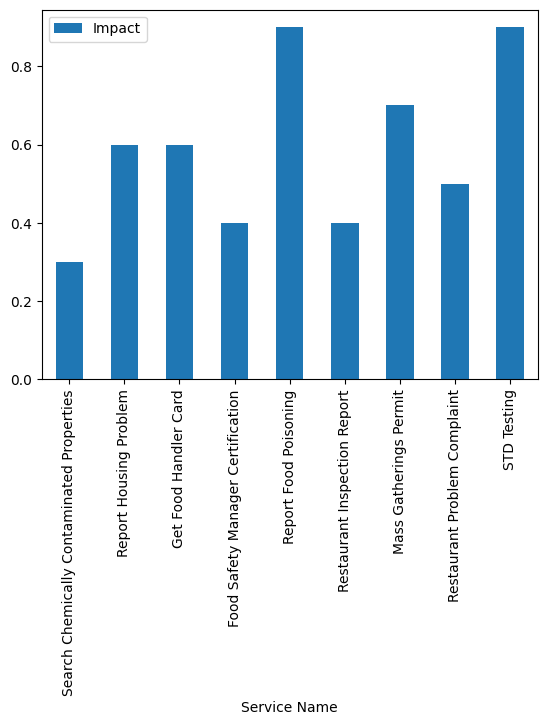

In [61]:
services.plot.bar(x="Service Name", y="Impact")
plt.show()

In [25]:
utilization = pd.read_csv("../data/utilization.csv")
utilization.head()

,Service Id,Year,Month,Number Served
0,1,2000,1,12999
1,2,2000,1,15753
2,3,2000,1,15293
3,4,2000,1,10459
4,5,2000,1,14698


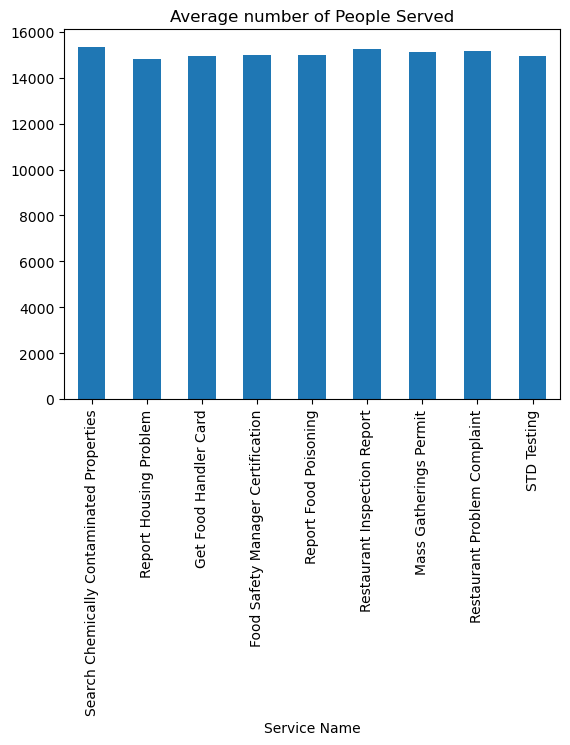

In [50]:
avg_number_served = utilization.groupby("Service Id")["Number Served"].mean()
avg_number_served.index = services["Service Name"]
avg_number_served.plot = template tool.served.plot(kind="bar", title="Average number of People Served")

plt.show()

In [59]:
program_data = [
    {"program": "Housing",
     "utilization": 500000,},
    {"program": "Food Protection",
     "utilization": 200000,},
    {"program": "STD",
     "utilization": 700000,},
]

tax = 12000000


def allocation_function(utilization_data, total_funds):
    total_utilization = sum([item.get("utilization") for item in utilization_data])
    allocations = []
    for item in utilization_data:
        percent_util = item.get("utilization", 0)/total_utilization
        allocated_funds = percent_util * total_funds
        allocations.append({**item, "allocated_funds": allocated_funds})

    return allocations

allocation_function(program_data, tax)




[{'program': 'Housing',
  'utilization': 500000,
  'allocated_funds': 4285714.285714285},
 {'program': 'Food Protection',
  'utilization': 200000,
  'allocated_funds': 1714285.714285714},
 {'program': 'STD', 'utilization': 700000, 'allocated_funds': 6000000.0}]

# Housing Reporting Housing Problem

In [46]:
housing_report = pd.read_csv("../data/housing-housing-problems.csv")
housing_report.head()

,Site Visits,Requests,Month,Year,Mortgages
0,115466,11184,2,2018,12947
1,111195,8748,8,2014,12034
2,104640,11013,9,2019,17823
3,96427,8522,9,2008,19891
4,100969,12376,5,2014,11747


In [64]:
X = housing_report[["Site Visits", "Month", "Year", "Mortgages"]]
Y = housing_report["Requests"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

print("Coefficients: ", model.coef_)
print("Intercept: :", model.intercept_)

Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
rmse = root_mean_squared_error(Y_test, Y_pred)
print(f"Mean squared Error: {mse}")
print(f"Root mean squared error: {rmse}")

Coefficients:  [ 1.80673315e-03 -1.96429112e+00 -8.55885899e+00  2.82026370e-02]
Intercept: : 26550.99542028706
Mean squared Error: 1709640.7783836764
Root mean squared error: 1307.5323240301466
